## Importing the essential libraries over here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset over here

In [2]:
data=pd.read_csv("waterquality.csv")

In [3]:
data.head()

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
0,1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0,-17.777778
1,1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5,20.500000
2,1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0,25.000000
3,1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5,29.000000
4,1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5,28.000000


In [4]:
data.shape

(2371, 8)

## Taking care of missing values if present over here

In [5]:
data.isnull().sum()

Date                        5
Salinity (ppt)            130
DissolvedOxygen (mg/L)    851
pH                         95
SecchiDepth (m)            73
WaterDepth (m)             71
WaterTemp (C)             121
AirTemp (C)                 0
dtype: int64

## Taking care of duplicate observations over here

In [6]:
data.duplicated().sum()

10

In [7]:
data.drop_duplicates(inplace=True)

## Taking care of missing values if present over here

In [8]:
missing_values=[feature for feature in data.columns if data[feature].isnull().sum()>1]
for feature in missing_values:
  print(feature)

Date
Salinity (ppt)
DissolvedOxygen (mg/L)
pH
SecchiDepth (m)
WaterDepth (m)
WaterTemp (C)


In [9]:
data[missing_values]

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C)
0,1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0
1,1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5
2,1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0
3,1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5
4,1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5
...,...,...,...,...,...,...,...
2366,NaN,0.0,NaN,7.0,0.3,0.5,14.0
2367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2368,NaN,0.0,3.9,6.5,0.3,1.8,22.0
2369,NaN,1.0,NaN,7.0,0.6,1.0,17.0


In [10]:
data.dropna(subset=['Date'],inplace=True)

<Axes: ylabel='Salinity (ppt)'>

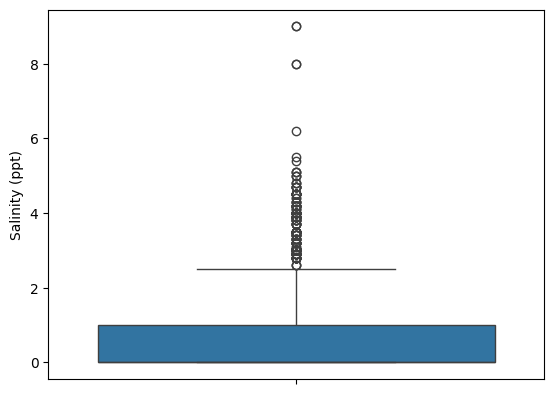

In [11]:
sns.boxplot(data['Salinity (ppt)'])

<Axes: ylabel='DissolvedOxygen (mg/L)'>

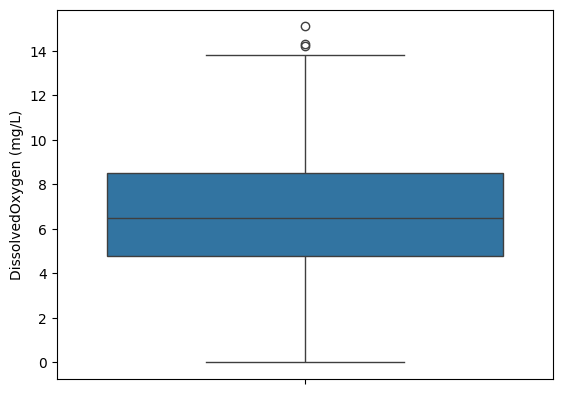

In [12]:
sns.boxplot(data['DissolvedOxygen (mg/L)'])

<Axes: ylabel='pH'>

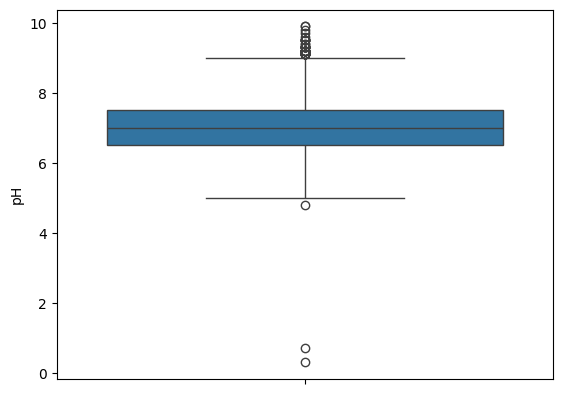

In [13]:
sns.boxplot(data['pH'])

<Axes: ylabel='SecchiDepth (m)'>

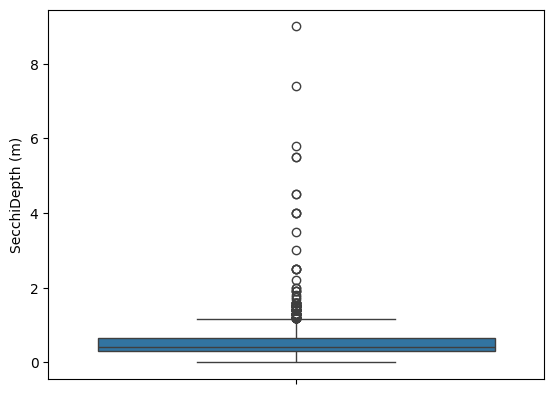

In [14]:
sns.boxplot(data['SecchiDepth (m)'])

<Axes: ylabel='WaterDepth (m)'>

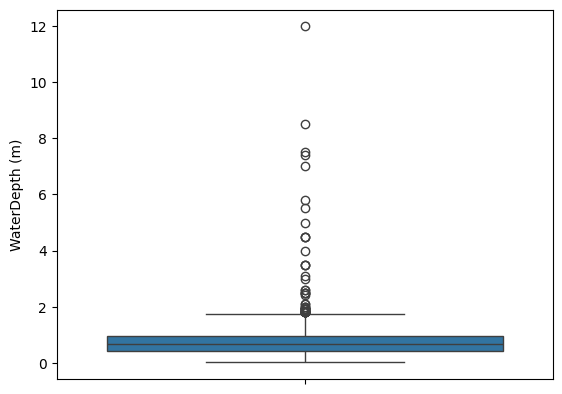

In [15]:
sns.boxplot(data['WaterDepth (m)'])

<Axes: ylabel='WaterTemp (C)'>

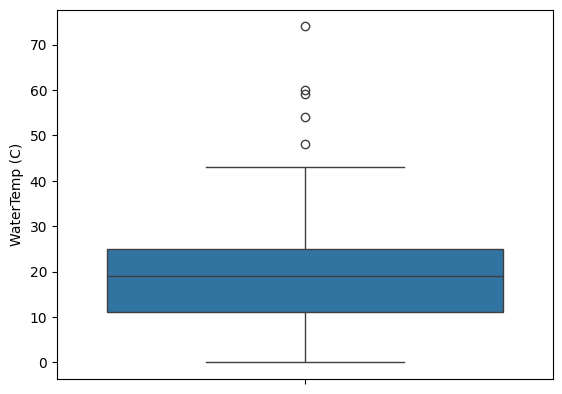

In [16]:
sns.boxplot(data['WaterTemp (C)'])

In [17]:
data

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
0,1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0,-17.777778
1,1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5,20.500000
2,1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0,25.000000
3,1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5,29.000000
4,1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5,28.000000
...,...,...,...,...,...,...,...,...
2361,2019-10-23,0.5,6.2,7.0,0.5,0.9,19.0,17.222222
2362,2019-10-23,0.0,NaN,6.5,0.9,1.0,20.0,17.222222
2363,2019-10-23,0.0,4.6,6.5,0.2,0.2,20.0,17.222222
2364,2019-10-28,0.1,NaN,6.5,0.7,1.0,13.0,9.444444


In [18]:
missing_values = [feature for feature in data.columns if data[feature].isnull().sum() > 1]
for feature in missing_values:
    mean_value = data[feature].mean()
    data[feature].fillna(mean_value, inplace=True)

In [19]:
data.isnull().sum()

Date                      0
Salinity (ppt)            0
DissolvedOxygen (mg/L)    0
pH                        0
SecchiDepth (m)           0
WaterDepth (m)            0
WaterTemp (C)             0
AirTemp (C)               0
dtype: int64

## Filtering all the numerical features over here

In [20]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='O']
for feature in numerical_features:
  print(feature)

Salinity (ppt)
DissolvedOxygen (mg/L)
pH
SecchiDepth (m)
WaterDepth (m)
WaterTemp (C)
AirTemp (C)


In [21]:
data[numerical_features]

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
0,0.718489,6.648071,7.5,0.3,0.9,17.0,-17.777778
1,0.718489,12.000000,7.5,0.2,0.6,17.5,20.500000
2,0.718489,6.648071,8.0,0.4,0.8,23.0,25.000000
3,0.718489,12.000000,8.0,0.4,0.9,25.5,29.000000
4,0.718489,6.648071,8.5,0.3,0.9,28.5,28.000000
...,...,...,...,...,...,...,...
2361,0.500000,6.200000,7.0,0.5,0.9,19.0,17.222222
2362,0.000000,6.648071,6.5,0.9,1.0,20.0,17.222222
2363,0.000000,4.600000,6.5,0.2,0.2,20.0,17.222222
2364,0.100000,6.648071,6.5,0.7,1.0,13.0,9.444444


## Filtering all the categorical features over here

In [22]:
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
for feature in cat_features:
  print(feature)

Date


## Encoding the categorical features over here

In [23]:
Date_mapping = {}
for index, date in enumerate(data['Date'].unique()):
    Date_mapping[str(index)] = date

print(Date_mapping)

{'0': '1989-05-11', '1': '1989-05-18', '2': '1989-05-25', '3': '1989-06-01', '4': '1989-07-11', '5': '1989-07-20', '6': '1989-07-27', '7': '1989-08-03', '8': '1989-08-10', '9': '1989-08-17', '10': '1989-08-31', '11': '1989-09-14', '12': '1989-10-25', '13': '1989-10-31', '14': '1989-11-20', '15': '1989-11-27', '16': '1989-12-11', '17': '1990-01-03', '18': '1990-01-08', '19': '1990-01-22', '20': '1990-01-30', '21': '1990-02-07', '22': '1990-02-12', '23': '1990-02-20', '24': '1990-02-27', '25': '1990-03-05', '26': '1990-03-12', '27': '1990-03-19', '28': '1990-03-26', '29': '1990-04-02', '30': '1990-04-09', '31': '1990-04-16', '32': '1990-04-23', '33': '1990-04-30', '34': '1990-05-07', '35': '1990-05-14', '36': '1990-05-21', '37': '1990-05-29', '38': '1990-06-04', '39': '1990-06-11', '40': '1990-06-16', '41': '1990-06-24', '42': '1990-07-02', '43': '1990-07-09', '44': '1990-07-16', '45': '1990-07-26', '46': '1990-08-06', '47': '1990-08-13', '48': '1990-08-27', '49': '1990-09-04', '50': '19

In [24]:
data.drop("Date",axis=1,inplace=True)

In [25]:
data

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
0,0.718489,6.648071,7.5,0.3,0.9,17.0,-17.777778
1,0.718489,12.000000,7.5,0.2,0.6,17.5,20.500000
2,0.718489,6.648071,8.0,0.4,0.8,23.0,25.000000
3,0.718489,12.000000,8.0,0.4,0.9,25.5,29.000000
4,0.718489,6.648071,8.5,0.3,0.9,28.5,28.000000
...,...,...,...,...,...,...,...
2361,0.500000,6.200000,7.0,0.5,0.9,19.0,17.222222
2362,0.000000,6.648071,6.5,0.9,1.0,20.0,17.222222
2363,0.000000,4.600000,6.5,0.2,0.2,20.0,17.222222
2364,0.100000,6.648071,6.5,0.7,1.0,13.0,9.444444


## Creating the features and labels over here

In [26]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

## Splitting the dataset into training set and testing set to avoid the problem of overfitting over here

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Experiment with different algorithms and selecting the one giving more accuracy with respect to performance metrics

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from xgboost import XGBRegressor

regressors = {
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(kernel='linear'),
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    # "Decision Tree": DecisionTreeRegressor(),
    "Bayesian Ridge": BayesianRidge(),
    "XGBoost": XGBRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

results = {}
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

best_regressor = min(results, key=results.get)
best_mse = results[best_regressor]

print("Best Regressor:", best_regressor)
print("Mean Squared Error:", best_mse)

Best Regressor: Bayesian Ridge
Mean Squared Error: 49.70613243325085


In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor=BayesianRidge()
regressor.fit(X_train,y_train)

BayesianRidge()

In [30]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 18.69  18.89]
 [ 13.6   13.89]
 [ 18.6   17.78]
 [ 21.99  -1.67]
 [ 17.59  20.56]
 [ 16.24  18.33]
 [  7.87   7.78]
 [ 13.09  11.11]
 [ 13.89  15.56]
 [ 14.59  15.56]
 [ 23.01 -17.78]
 [ 13.63  14.44]
 [ 28.53 -17.78]
 [ 22.91  31.67]
 [ 23.35  26.67]
 [ 24.19  29.  ]
 [  7.93   9.44]
 [  8.33  14.  ]
 [ 24.79  30.  ]
 [  4.56   4.5 ]
 [ 19.61  24.  ]
 [ 15.06  17.  ]
 [  1.39  -1.67]
 [ 11.12  11.67]
 [ 22.1   25.56]
 [  7.78  11.67]
 [  7.74   7.22]
 [ 19.17  21.11]
 [ 26.79  28.33]
 [ 14.58  15.56]
 [ 16.17  16.11]
 [ 11.26  13.  ]
 [ 22.89  23.89]
 [ 12.2   13.89]
 [ 21.78  27.22]
 [ 17.06  19.44]
 [ 20.39  25.56]
 [  8.39   6.67]
 [ 14.3   18.33]
 [ 12.07  15.56]
 [ 13.71  21.11]
 [  5.43   3.33]
 [ 24.38  26.67]
 [ 16.09  15.56]
 [ 11.88  10.  ]
 [ 20.78  25.56]
 [ 12.07   7.22]
 [  5.2    3.33]
 [  5.35   4.44]
 [ 21.84  23.89]
 [ 11.81  10.56]
 [  4.49   4.44]
 [ 17.23  17.78]
 [ 15.61  22.22]
 [ 21.81  26.11]
 [ 12.76  18.33]
 [ 21.04  22.61]
 [ 11.34   8.89]
 [ 10.43  15. 

In [33]:
actual_vs_predicted=pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
print(actual_vs_predicted)

        Actual  Predicted
0    18.888889  18.686058
1    13.888889  13.595863
2    17.777778  18.598374
3    -1.666667  21.986531
4    20.555556  17.586531
..         ...        ...
467  25.555556  21.292574
468  26.666667  21.847233
469   7.777778   9.523278
470  18.333333  15.382138
471  16.666667  10.955361

[472 rows x 2 columns]


In [34]:
actual_vs_predicted['Absolute Difference'] = abs(actual_vs_predicted['Actual'] - actual_vs_predicted['Predicted'])

In [35]:
actual_vs_predicted

,Actual,Predicted,Absolute Difference
0,18.888889,18.686058,0.202830
1,13.888889,13.595863,0.293026
2,17.777778,18.598374,0.820596
3,-1.666667,21.986531,23.653198
4,20.555556,17.586531,2.969025
...,...,...,...
467,25.555556,21.292574,4.262982
468,26.666667,21.847233,4.819434
469,7.777778,9.523278,1.745500
470,18.333333,15.382138,2.951195
